<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/LR/model4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model 4
Predictors: day_of_week (linear organisation based on crime_count mean), temp

Mon 3,
Tue 7,
Wed 5,
Thu 4,
Fri 1,
Sat 2,
Sun 6,

In [27]:
# Set-up
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/LR/LR4.csv')

In [29]:
randomised = data.iloc[np.random.permutation(len(data))]

In [30]:
randomised

,day_of_week,temp,crime_count
1584,7,76.300000,0.707965
388,5,35.266667,0.024615
766,5,32.466667,0.180921
334,3,46.633333,0.297450
1452,5,41.300000,0.439528
...,...,...,...
814,7,47.766667,0.381579
1648,4,61.366667,0.306785
1419,4,36.000000,0.584071
1449,6,34.800000,0.200590


In [31]:
predictors = randomised.iloc[:,0:2]
targets = randomised.iloc[:,2]
train_size = int(len(randomised)*0.8)
qty_predictors = 2
qty_targets = 1

In [32]:
# Design model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(qty_targets, input_shape=[qty_predictors]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))


In [33]:
# View model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Train model
history = model.fit(predictors.iloc[0:train_size], targets.iloc[0:train_size], epochs=250)

Epoch 1/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 2/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 3/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 4/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 5/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 6/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 7/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 8/250
44/44 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 9/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 10/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 11/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 12/250
44/44 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 13/250
44/44 [=================

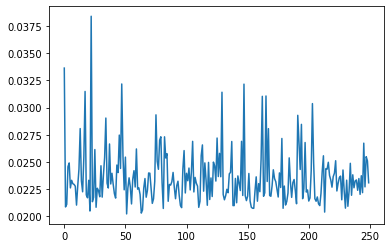

In [49]:
# View training history
plt.plot(history.history['loss'])

In [50]:
# Test model
model_test = model.predict(predictors.iloc[train_size:])

In [54]:
# Analyse model quality vs mean 
rmse = np.sqrt(np.mean((targets[train_size:].values - model_test)**2))
print('LinearRegression has RMSE of {0}'.format(rmse));

avg = np.mean(data['crime_count'][:train_size])

rmse = np.sqrt(np.mean((targets[train_size:].values - avg)**2))
print('Using the training data mean of {0} would have has resulted in a RMSE of {1}'.format(avg, rmse));

LinearRegression has RMSE of 0.25245429962305993
Using the training data mean of 0.5080399258596116 would have has resulted in a RMSE of 0.1983584388437589
